In [2]:
import netCDF4
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from utils.image_transform import resize_image, crop_center_square, transform_color
from patchify import patchify

In [3]:
def visualize_ir(img, colorbar='False', save_path=None):
    plt.imshow(img, cmap='cividis')

    if colorbar:
        plt.colorbar()
    
    if not save_path==None:
        cv2.imwrite(save_path, img)

In [4]:
ir_dir = 'E:/polar/code/data/flight9/IRdata_ATWAICE_processed_220718_142920.nc'
mask_dir = 'E:/polar/code/data/ir/entire/original_size/msks'

#### Convert netcdf data to numpy array ####
ds = netCDF4.Dataset(ir_dir)
imgs = ds.variables['Ts'][:]
timestamps = ds.variables['time'][:]

In [5]:
imgs_train = [imgs[2416],imgs[2380],imgs[2452],imgs[2468],imgs[2476],imgs[2708],imgs[3700],imgs[3884]]
tmp = []

for im in imgs_train:
    im = crop_center_square(im)
    tmp.append(im)

imgs_train = tmp

In [45]:
print(np.amax(imgs))

277.37253


In [32]:
masks_train = []
for f in os.listdir(mask_dir):
    path = os.path.join(mask_dir, f)
    mask = cv2.imread(path, 0)
    print(np.unique(mask))
    mask = transform_color(mask)
    print(np.unique(mask))
    mask = resize_image(mask)
    mask = crop_center_square(mask)

    masks_train.append(mask)

imgs = np.array(imgs_train)
masks = np.array(masks_train)

np.save('E:/polar/code/data/ir/entire/original_size/prepared/480_im.npy', imgs)
np.save('E:/polar/code/data/ir/entire/original_size/prepared/480_ma.npy', masks)

[  0  76 255]
[0 1 2]
[  0  76 255]
[0 1 2]
[  0  76 255]
[0 1 2]
[  0  76 255]
[0 1 2]
[  0  76 255]
[0 1 2]
[  0  76 255]
[0 1 2]
[  0  76 255]
[0 1 2]
[  0  76 255]
[0 1 2]


In [46]:
#h = cv2.imread('E:/polar/code/data/ir/entire/original_size/msks/3.png', 0)
#print(np.unique(h))
#print(h[h==217])

indices = np.where(imgs == 277.37253)
print(indices)

# If any indices were found, return the position of the first occurrence
if len(indices[0]) > 0:
    #im, row, col = indices[][], indices[0][0], indices[1][0]
    #print(row, col)
    print('hello')
print(indices[0].shape)

#mask2 = np.where(h == 147)
#h[mask2] = 76

#print(np.unique(h))
#cv2.imwrite('E:/polar/code/data/ir/entire/original_size/msks/3.png', h)

(array([7], dtype=int64), array([380], dtype=int64), array([39], dtype=int64))
hello
(1,)


In [47]:
print(imgs[7,380,39])

277.37253


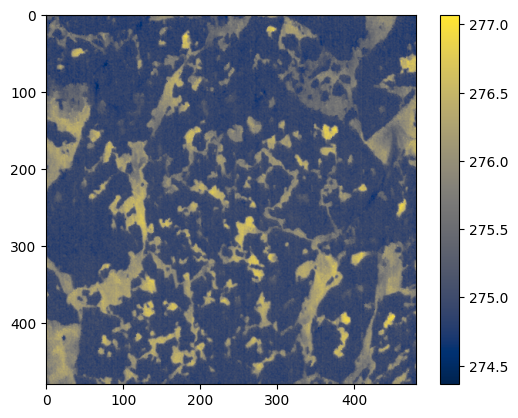

In [35]:
visualize_ir(imgs[0])

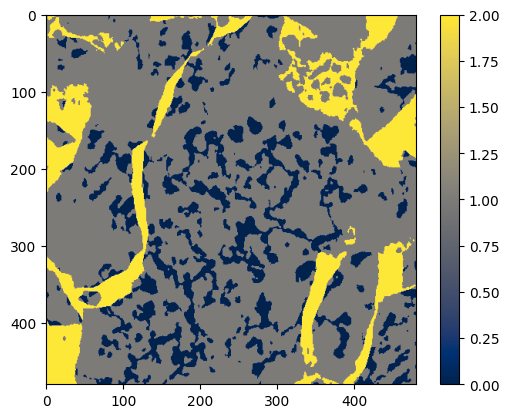

In [22]:
visualize_ir(masks_train[0])

In [24]:
print(masks_train[6].shape)
print(imgs_train[6].shape)

print(imgs.shape)
print(masks.shape)

print(type(imgs))
print(np.unique(masks_train[6]))

(480, 480)
(480, 480)
(8, 480, 480)
(8, 480, 480)
<class 'numpy.ndarray'>
[0 1 2]


In [40]:
def transform_color_maks(image):
    uniques = np.unique(image)
    
    for idx,elem in enumerate(uniques):
        mask = np.where(image == 1)
        image[mask] = 125
        mask2 = np.where(image == 2)
        image[mask2] = 255
    return image

In [25]:
def patch_extraction(size, step):
    img_patches = []
    for img in imgs_train:     
        patches_img = patchify(img, (size, size), step=step)
        for i in range(patches_img.shape[0]):
            for j in range(patches_img.shape[1]):
                single_patch_img = patches_img[i,j,:,:]
                img_patches.append(single_patch_img)
    images = np.array(img_patches)

    mask_patches = []
    for img in masks_train:
        patches_mask = patchify(img, (size, size), step=step)
        
        for i in range(patches_mask.shape[0]):
            for j in range(patches_mask.shape[1]):
                single_patch_mask = patches_mask[i,j,:,:]
                mask_patches.append(single_patch_mask)
    masks = np.array(mask_patches)

    return images, masks


patches_256 = patch_extraction(size=256, step=224) # step 224 means that there will be overlap
patches_128 = patch_extraction(size=128, step=160) # step 120 means that there will be overlap
patches_64 = patch_extraction(size=64, step=68) # step 68 means that there will be parts of the image left out
patches_32 = patch_extraction(size=32, step=32) # no overlap

276.11893
277.0708
(array([21], dtype=int64), array([295], dtype=int64))


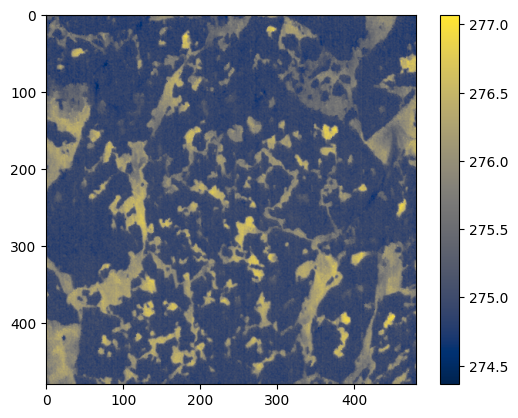

In [55]:
print(np.amax(patches_32[0][0]))
print(np.amax(imgs[0]))
visualize_ir(imgs[0])

print(np.where(imgs[0]==277.0708))

277.0708


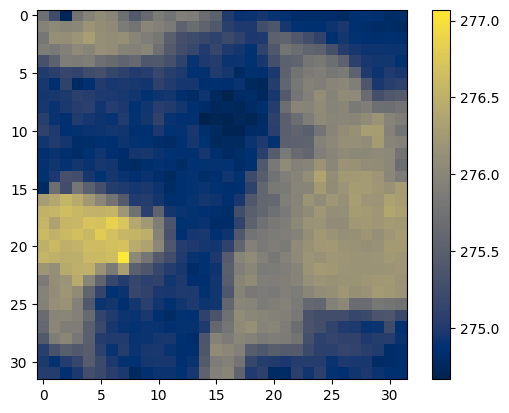

In [59]:
visualize_ir(patches_32[0][9])
print(np.amax(patches_32[0][9]))

In [26]:
np.save('E:/polar/code/data/ir/entire/original_size/prepared/256_im.npy',patches_256[0])
np.save('E:/polar/code/data/ir/entire/original_size/prepared/256_ma.npy',patches_256[1])
np.save('E:/polar/code/data/ir/entire/original_size/prepared/128_im.npy',patches_128[0])
np.save('E:/polar/code/data/ir/entire/original_size/prepared/128_ma.npy',patches_128[1])
np.save('E:/polar/code/data/ir/entire/original_size/prepared/64_im.npy',patches_64[0])
np.save('E:/polar/code/data/ir/entire/original_size/prepared/64_ma.npy',patches_64[1])
np.save('E:/polar/code/data/ir/entire/original_size/prepared/32_im.npy',patches_32[0])
np.save('E:/polar/code/data/ir/entire/original_size/prepared/32_ma.npy',patches_32[1])

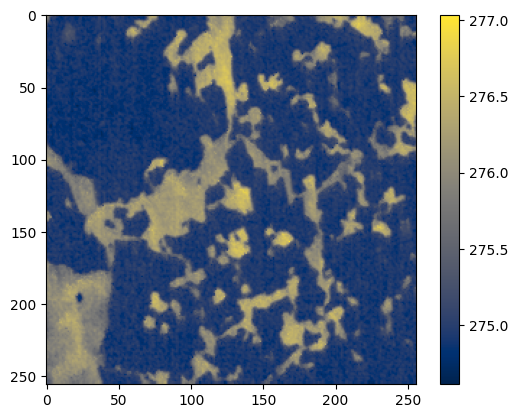

In [29]:
visualize_ir(patches_256[0][2])

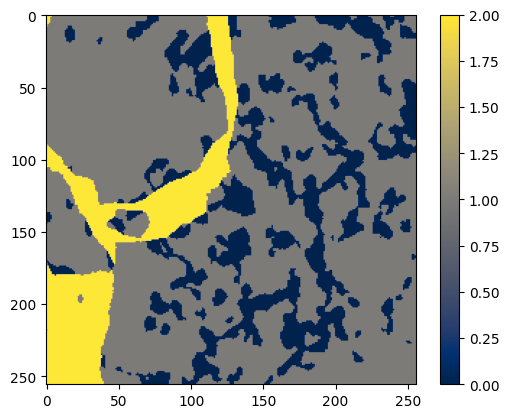

In [30]:
visualize_ir(patches_256[1][2])

In [31]:
print(patches_256[1].shape)
print(patches_128[1].shape)
print(patches_64[1].shape)
print(patches_32[1].shape)

(32, 256, 256)
(72, 128, 128)
(392, 64, 64)
(1800, 32, 32)
(32, 256, 256)
(32, 256, 256)


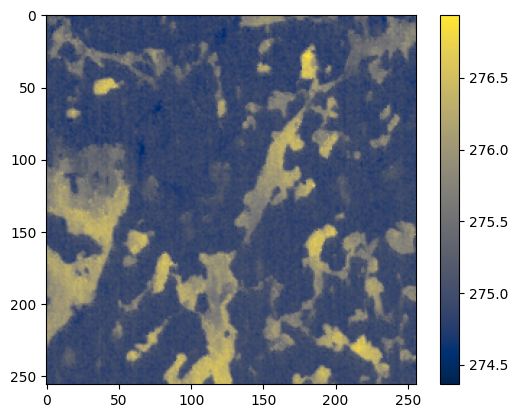

In [121]:
visualize_ir(imgs[0,:,:])

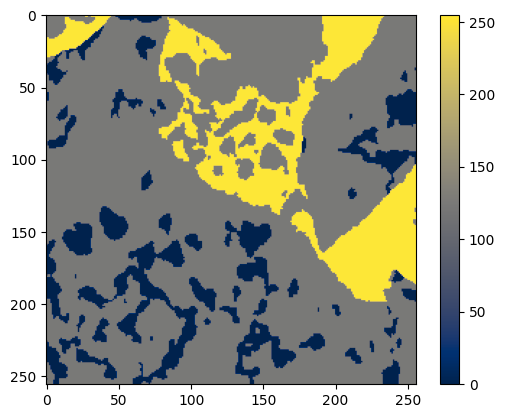

In [120]:
visualize_ir(msks[1,:,:])

32: 1800 images
64: 392 images
128: 72 images
256: 32 images
480: 8 images

In [25]:
g = cv2.imread('E:/polar/code/data/test/predict/to_predict/20220718_153310_437.png')
g = crop_center_square(g, 256)
cv2.imwrite('E:/polar/code/data/test/predict/tmp/1.png', g)

True